In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [197]:
mean1 = 4
mean2 = 3.8
mean3 = 7

N1 = 30
N2 = 35
N3 = 29

st_dev = 2

In [220]:
data1 = mean1 + np.random.randn(N1) * st_dev
data2 = mean2 + np.random.randn(N2) * st_dev
data3 = mean3 + np.random.randn(N3) * st_dev

data_column = np.hstack((data1, data2, data3))

groups = ['1'] * N1 + ['2'] * N2 + ['3'] * N3

df = pd.DataFrame({'The Data': data_column, 'Group': groups})
df

,The Data,Group
0,5.272325,1
1,5.337497,1
2,5.125638,1
3,2.109839,1
4,7.257989,1
...,...,...
89,8.757962,3
90,9.020524,3
91,2.313407,3
92,7.550898,3


In [221]:
pg.anova(data=df, dv='The Data', between='Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,91,31.928274,3.123112e-11,0.412359


In [222]:
pg.pairwise_tukey(data=df, dv='The Data', between='Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,4.707480,3.701097,1.006384,0.449422,2.239285,7.002572e-02,0.602930
1,1,3,4.707480,7.259756,-2.552276,0.470391,-5.425864,1.411138e-06,-1.377006
2,2,3,3.701097,7.259756,-3.558660,0.453575,-7.845799,2.394884e-11,-1.818141


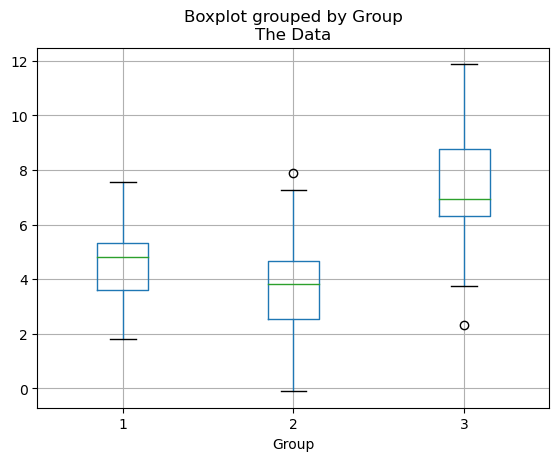

In [223]:
df.boxplot('The Data', 'Group')

plt.show()

In [226]:
data = np.array([
    [61, 68, 82, 90],
    [57, 78, 84, 87],
    [70, 65, 90, 75],
    [65, 57, 75, 88],
    [67, 55, 0, 85]
])

data = data.ravel()
genre = np.tile(np.arange(4), 5)

df2 = pd.DataFrame({'Happiness rating': data, 'Movie genre': genre})
df2.drop(index=18, inplace=True)

In [227]:
pg.anova(data=df2, dv='Happiness rating', between='Movie genre', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Movie genre,1850.471053,3,616.823684,13.256473,0.000171,0.726125
1,Within,697.950000,15,46.530000,NaN,NaN,NaN


In [229]:
pg.pairwise_tukey(data=df2, dv='Happiness rating', between='Movie genre')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,0,1,64.00,64.60,-0.60,4.314163,-0.139077,0.998995,-0.072647
1,0,2,64.00,82.75,-18.75,4.575861,-4.097590,0.004695,-2.981424
2,0,3,64.00,85.00,-21.00,4.314163,-4.867688,0.001050,-3.448680
3,1,2,64.60,82.75,-18.15,4.575861,-3.966467,0.006077,-1.999008
4,1,3,64.60,85.00,-20.40,4.314163,-4.728612,0.001371,-2.380746
5,2,3,82.75,85.00,-2.25,4.575861,-0.491711,0.959741,-0.332838


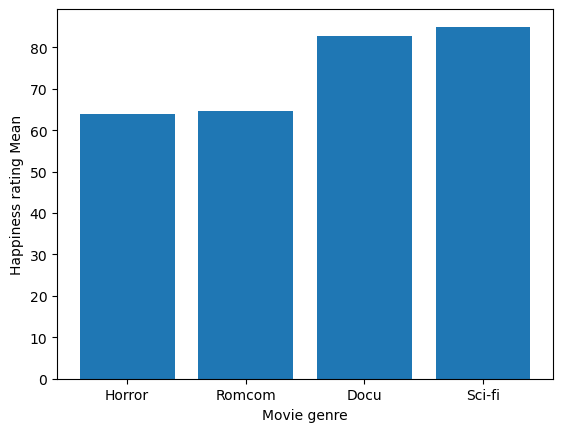

In [228]:
plt.bar(df2['Movie genre'].unique(), [df2[df2['Movie genre'] == x]['Happiness rating'].mean() for x in range(df2['Movie genre'].max() + 1)])

plt.xticks([0, 1, 2, 3], ['Horror', 'Romcom', 'Docu', 'Sci-fi'])
plt.xlabel('Movie genre')
plt.ylabel('Happiness rating Mean')

plt.show()